### 목표: 생선 품종 분류 모델

-   데이터 : fish.csv
-   피 쳐 : Weight, Length
-   타 겟 : Species
-   기계학습 : 지도학습 + 분류 (도미, 빙어 분류는 이진분류)


(1) 모듈 로딩 및 데이터 준비 <hr>


In [116]:
#
import pandas as pd


In [117]:
# 데이터 파일 설정
data_file = "../data/fish.csv"


In [118]:
# DF로 데이터 준비
# fishDF = pd.read_csv(data_file, usecols=[0, 1, 2])
fishDF = pd.read_csv(data_file, usecols=["Species", "Weight", "Length"])

# 기본정보 확인
fishDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


(2) 데이터 전처리

-   결측치, 중복데이터, 이상치


In [119]:
# 컬럼별 고유값으로 이상치 체크 => unique()
print("fishDF.Species =>", fishDF.Species.unique())
print("fishDF.Weight =>", fishDF.Weight.unique())
print("fishDF.Length =>", fishDF.Length.unique())


fishDF.Species => ['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
fishDF.Weight => [ 242.   290.   340.   363.   430.   450.   500.   390.   475.   600.
  700.   610.   650.   575.   685.   620.   680.   725.   720.   714.
  850.  1000.   920.   955.   925.   975.   950.    40.    69.    78.
   87.   120.     0.   110.   150.   145.   160.   140.   169.   161.
  200.   180.   272.   270.   306.   540.   800.    55.    60.    90.
  170.   273.   300.     5.9   32.    51.5   70.   100.    80.    85.
  115.   125.   130.   135.   225.   188.   197.   218.   260.   265.
  250.   320.   514.   556.   840.   690.   900.   820.  1015.  1100.
  345.   456.   510.   567.   770.  1250.  1600.  1550.  1650.     6.7
    7.5    7.     9.7    9.8    8.7   10.     9.9   12.2   13.4   19.7
   19.9]
fishDF.Length => [25.4 26.3 26.5 29.  29.7 30.  30.7 31.  31.5 32.  33.  33.5 34.  34.5
 35.  36.  37.  38.5 39.5 41.  14.1 18.2 18.8 19.8 20.  20.5 20.8 21.
 22.  22.5 24.  23.4 23.5 25.2 26.

In [120]:
# 결측치 체크 => isna()/ isnull()
fishDF.isna().sum()


Species    0
Weight     0
Length     0
dtype: int64

In [121]:
# 중복데이터 => duplicated()
fishDF.duplicated().sum()


4

In [122]:
# 'Bream', 'Smelt' 두가지 품종 데이터만 추출
mask = fishDF.Species.isin(["Bream", "Smelt"])
twoFishDF = fishDF[mask]

# 인덱스 리셋 : 기존 인덱스 삭제 후 0-base 인덱스 설정
# Scikit-learn에 저장 시 ndarray 타입으로 저장되면서 인덱스 정리
twoFishDF.reset_index(drop=True, inplace=True)

# 기본 정보 확인
twoFishDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     object 
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [138]:
# 피쳐 데이터 추출
feature = twoFishDF[twoFishDF.columns[1:]]

# 데이터 확인
print(feature.head(3), feature.tail(3), sep="\n\n")


   Weight  Length
0   242.0    25.4
1   290.0    26.3
2   340.0    26.5

    Weight  Length
46    12.2    13.0
47    19.7    14.3
48    19.9    15.0


In [124]:
# 타겟 데이터 추출
target = twoFishDF.Species

# Bream => 0, Smelt => 1
target = target.replace({"Bream": 0, "Smelt": 1}).copy()

# 데이터 확인
print(target.head(3), target.tail(3), sep="\n\n")


0    0
1    0
2    0
Name: Species, dtype: int64

46    1
47    1
48    1
Name: Species, dtype: int64


(4) 학습 진행

-   알고리즘 구현 인스턴스 생성 => 지도학습 - 분류 알고리즘 중 선택 : KNN
-   학습 진행 매서드 => fit()


In [125]:
# 모듈 로딩
from sklearn.neighbors import KNeighborsClassifier


In [126]:
# (4-1) KNN 인스턴스 생성
model = KNeighborsClassifier()
model


KNeighborsClassifier()

In [127]:
# (4-2) 학습 진행
model.fit(feature, target)


KNeighborsClassifier()

In [128]:
# 학습 후 속성 확인
print("classes_ :", model.classes_)
print("feature_names_in_ :", model.feature_names_in_)
print("n_features_in_ :", model.n_features_in_)


classes_ : [0 1]
feature_names_in_ : ['Weight' 'Length']
n_features_in_ : 2


(5) 학습 후 검사 즉 테스트 => 메서드 : score()

-   결과값 : 0.0(0%) ~ 1.0(100%)
-   사용 데이터 : 학습에 사용되지 않은 데이터


In [129]:
model.score(feature, target)


1.0

(6) 예측 즉 서비스에 모델 활용 시 사용 => 메서드 : predict()

-   조건 : 학습 시 전달된 데이터와 동일한 형태의 데이터 전달


In [130]:
# [무게, 길이]
new_data = pd.DataFrame([[21.8, 17]], columns=model.feature_names_in_)

# 학습 시 제공된 데이터와 동일한 형태로 제공
pred_y = model.predict(new_data)
pred_y


array([1], dtype=int64)

In [131]:
# 예측 확률
model.predict_proba(new_data)


array([[0., 1.]])

In [155]:
# 데이터와 최근접 이웃 데이터 => kneighbors() 메서드
# 반환값 : 거리, 원소번호
dis, ind = model.kneighbors(new_data)

# ndarray => list
ind.tolist()[0]


[48, 47, 45, 46, 44]

In [158]:
# K개의 최근접 이운 데이터만 저장
kneightDF = feature.iloc[ind.tolist()[0]]
kneightDF


,Weight,Length
48,19.9,15.0
47,19.7,14.3
45,13.4,12.4
46,12.2,13.0
44,12.2,12.2


In [133]:
feature.index, feature.shape


(RangeIndex(start=0, stop=49, step=1), (49, 2))

<Axes: title={'center': 'Weight & Length'}, xlabel='Weight', ylabel='Length'>

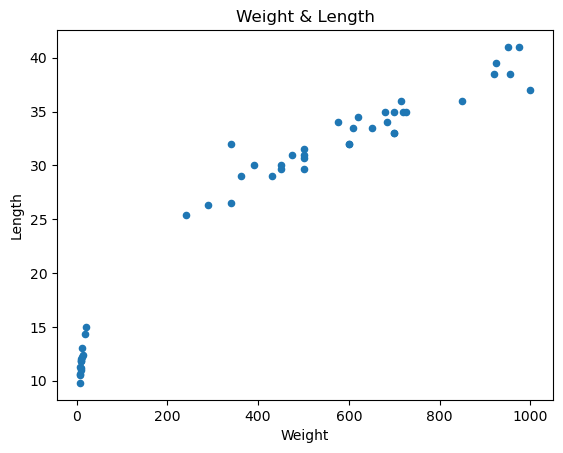

In [142]:
# Weight & Length 시각화
# feature.plot.scatter(x="Weight", y="Length", c="orange")
feature.plot(kind="scatter", x="Weight", y="Length", title="Weight & Length")


In [135]:
# matplotlib 활용
import matplotlib.pyplot as plt


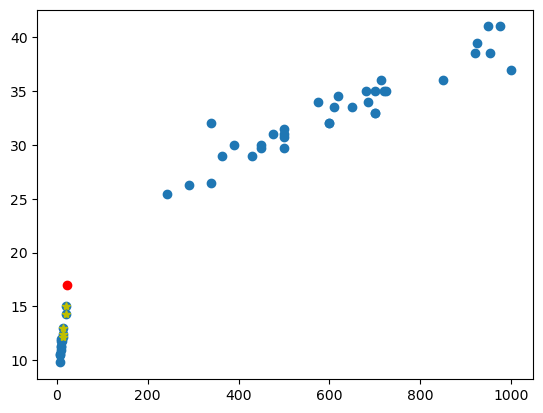

In [188]:
# 데이터 시각화
plt.scatter(x=feature.Weight, y=feature.Length)

# 새로운 데이터 시각화
plt.plot(new_data.Weight[0], new_data.Length[0], "ro")

# 새로운 데이터의 K개 최근접 이웃 데이터 시각화
plt.plot(kneightDF.Weight, kneightDF.Length, "y*")
plt.show()
